---
Código para análise de dados do Experimento 1 de Laboratório de Física I

Feito pelo aluno

 Vinícius dos Passos de Souza, RA: 11201922119

---



**Código para cálculo de MMQ($x$,$y$,$\sigma_y$)**

In [1]:
import numpy as np
def MMQ(x,y,ey):
  #SOMA Y/ERRO^2
  s1=0
  #SOMA X/ERRO^2
  s2=0
  #SOMA 1/ERRO^2
  s3=0
  #SOMA X*Y/ERRO^2
  s4=0
  #SOMA X^2/ERRO^2
  s5=0
  for i in range(len(y)):
      s1= (y[i])/((ey[i])**2)+s1
      s2 = (x[i])/((ey[i])**2)+s2
      s3= 1/((ey[i])**2)+s3
      s4= (x[i]*y[i])/((ey[i])**2)+s4
      s5 = ((x[i])**2)/((ey[i])**2)+s5
  v=(len(y))/s3
  v1=s5/s3
  v2=s2/s3
  a = (s1*s2-s3*s4)/(s2**2-s5*s3)

  return [a,(v/((v1-v2**2)*len(y)))**0.5, 
   (s1-a*s2)/(s3),(v*v1/((v1-v2**2)*len(y)))**0.5]
#Devolve lista com (coef. angular, erro coef. angular, coef linear, erro coef linear)

**Adicionar os 
[DADOS](https://docs.google.com/spreadsheets/d/1CLpfpYSdI0fd9WszVqevz2mIBTUWz9jL9UcDiVNRv7E/edit?usp=sharing)**

Baixar essa planilha e adicionar para esse programa ler

In [2]:
#ADicionar excel aqui e ler ele
import pandas as pd
excel = pd.ExcelFile('LAb1_EXP1.xlsx')

data = pd.read_excel(excel,'TABELAS')

In [3]:
#Colocar os dados nas listas
import numpy as np
x = np.array(data['x (m)'].values)
ex = np.array(data['e_x'].values)

#medidas de t^2
t=[[],[],[],[],[],[]]
#erros de t^2
et=[[],[],[],[],[],[]]
#Puxando dados do excel para o programa
for i in range(len(t)):
  t[i]=data[f't{i+1}'].values
  et[i] = data[f'et{i+1}'].values


**Cacular coeficientes da reta feita de $x=at^2+b$**

In [4]:
#Lista com coeficientes a, ea, b ,eb
c=[[],[],[],[],[],[]]

for i in range(0,len(t)):
  c[i]=MMQ(t[i],x,ex)
  print(f'Reta {i}: x = ({c[i][0]}+-{c[i][1]})t^2+({c[i][2]}+-{c[i][3]})')

Reta 0: x = (0.08482253194308569+-0.0001053626575835055)t^2+(-0.0012014359695255552+-0.0004446796838872498)
Reta 1: x = (0.43072924552325953+-0.0005350224367850538)t^2+(2.0529702241650477e-05+-0.000443663541972925)
Reta 2: x = (0.7834706594728856+-0.0009731910897976313)t^2+(0.0012590640957718649+-0.0004426436913190735)
Reta 3: x = (1.1265190117478907+-0.0013993467887119524)t^2+(0.0017844537627690782+-0.000442215606380305)
Reta 4: x = (0.5692275154065028+-0.0007071098750853249)t^2+(0.002345801711846047+-0.00044175965538344246)
Reta 5: x = (0.25697779420761346+-0.00031920159457792864)t^2+(0.000508679389616797+-0.0004432606764958728)


**Plotar gráfico de $x$ $(m)$ VS $t^2$ $(s^2)$**

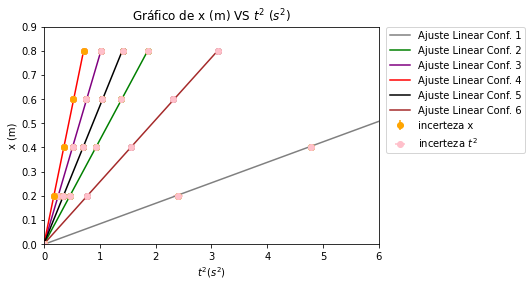

In [16]:
import matplotlib.pyplot as plt

col = ['gray','green','purple','red','black','brown']

for i in range(len(t)):
  #plot dos pontos
  plt.plot(t[i],x,'o',color = col[i])
  #plot das retas
  plt.plot(t[i],t[i]*c[i][0]+c[i][2],'-',color = col[i],label = f'Ajuste Linear Conf. {i+1}')

#plot errorbar
for i in range(len(t)-1):
  plt.errorbar(t[i],x,yerr = ex,fmt='o',color = 'orange')
  plt.errorbar(t[i],x,xerr=et[i],fmt='o',color ='pink')
#colcoar legenda da error bar
plt.errorbar(t[i-1],x,yerr = ex,fmt='o',color = 'orange',label = 'incerteza x')
plt.errorbar(t[-+1],x,xerr=et[i+1],fmt='o',color = 'pink',label = 'incerteza $t^2$')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#tirar se n quiser legenda
plt.ylim([0,0.9]) #arruma tamanho eixo y
plt.xlim([0,6]) #arrumar tamanho eixo x
plt.title('Gráfico de x (m) VS $t^2$ $(s^2)$')
plt.xlabel('$t^2$($s^2$)')
plt.ylabel('x (m)')
plt.show()

**Adicionar Massa do corpo suspenso $m$ e do total $M_T$**

In [ ]:
#TODAS AS MASSAS EM g
m=5.26 #massa original do corpo suspenso
em=0.01 #erro da massa original do corpo suspenso

Mt=286.37 #massa total dos 2 corpos
eMt=0.02 #erro da massa total dos 2 corpos

u=10.01 #massa adicionada ao corpo suspenso
eu=0.01 #incerteza da massa adicionado ao corpo suspenso

**Obter massas suspensas e acelerações calculadas com modelo teórico**

$a = \frac{mg}{2M_t}$

In [ ]:
#massa corpo suspenso no decorrer dos setups
mh= np.array([5.26,(5.26+20),(5.26+40),(5.26+60),(5.26+30),(5.26+10)])
emh = np.array([0.01,(np.sqrt(0.01**2+(2*0.01)**2)),(np.sqrt(0.01**2+(4*0.01)**2)),(np.sqrt(0.01**2+(6*0.01)**2)),
                (np.sqrt(0.01**2+(3*0.01)**2)),(np.sqrt(0.01**2+(0.01)**2))])

#aceleração calculada com modelo teórico
for i in range(len(t)):
  print(f'a_{i} = \({mh[i]*9.8/(2*Mt)}\pm {9.8/2*np.sqrt(emh[i]**2/Mt**2+mh[i]**2*eMt**2/Mt**4)}\)')

a_0 = \(0.09000244439012467\pm 0.0001712227254013524\)
a_1 = \(0.4322170618430701\pm 0.00038379648920011623\)
a_2 = \(0.7744316792960156\pm 0.0007075637030135029\)
a_3 = \(1.1166462967489612\pm 0.001043722744694875\)
a_4 = \(0.6033243705695429\pm 0.000542726960647189\)
a_5 = \(0.2611097531165974\pm 0.0002426684317112111\)


---
---
---
**Associação com Gravidade**

PAra isso tentarei plotar um gráfico no formato $a=C\frac{m}{Mt}$ (o $C$ deve dar metade da gravidade).

In [ ]:
#acelerações
a=np.ones(len(t))
ea=np.ones(len(t))

for i in range(len(t)):
  a[i]=c[i][0]
  ea[i]=c[i][1]
  #print(f'\({a[i]} \pm {ea[i]}\) ') #para ver tabela
print('-')
#G seria os valores de mh/Mt
G = np.ones(len(t))
eG = np.ones(len(t))
for i in range(len(t)):
  G[i]=mh[i]/Mt
  eG[i] = np.sqrt( (emh[i]/Mt)**2 + (eMt*mh[i]/(Mt**2))**2 )
  #print(f'\( {G[i]}\pm{eG[i]}\)') #printe se quiser fazer tabela 

#MMQ
J = MMQ(G,a,ea)
print(f'C=({J[0]}+- {J[1]})')
print(f'0={J[2]}+-{J[3]}')
print(f'g = ({J[0]*2}+- {J[1]*(2)})m/s^2')

-
C=(4.888360967922004+- 0.000691497070294889)
0=-0.004963517208758208+-2.745954042643151e-05
g = (9.776721935844009+- 0.001382994140589778)m/s^2


**Plotar o gráfico de $a$ por $\frac{m}{Mt}$**

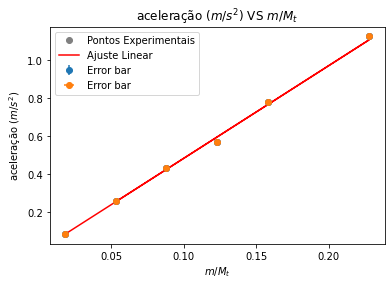

In [ ]:
plt.plot(G,a,'o',color = 'gray',label = 'Pontos Experimentais')
plt.plot(G,G*J[0]+J[2],'-',color = 'red', label = 'Ajuste Linear')

plt.errorbar(G, a,yerr=ea,fmt='o', label = 'Error bar')
plt.errorbar(G, a, xerr=eG,fmt='o', label = 'Error bar')        


#plt.ylim([0,0.75])
#plt.xlim([-0.0005,0.0708])
plt.legend()
plt.title('aceleração ($ m/s^2$) VS $m/M_t$ ')
plt.ylabel('aceleração ($m/s^2$)')
plt.xlabel('$ m/M_t$')
plt.show()

---
---
---
**Calcular forças e Acelerações**

Erro da força calculado usando propagação de Erro
$\sigma_F = \pm g\sqrt{\sigma_m^2 + \left( \sigma_{added mass}\right)^2 }$

In [ ]:
g=9.8

#definindo forças
F= mh*g*10**(-3)
eF= emh*g*10**(-3)


print(f'F = {F}+-')
print(f'sigma_F = {eF}')
print(f'a(m/s^2) = {a}')
print(f'sigma_a = {ea}')

F = [0.051548 0.247548 0.443548 0.639548 0.345548 0.149548]+-
sigma_F = [9.80000000e-05 2.19134662e-04 4.04064351e-04 5.96110728e-04
 3.09903211e-04 1.38592929e-04]
a(m/s^2) = [0.08482253 0.43072925 0.78347066 1.12651901 0.56922752 0.25697779]
sigma_a = [2.10725315e-05 1.07004487e-04 1.94638218e-04 2.79869358e-04
 1.41421975e-04 6.38403189e-05]


**Conseguir Reta(MMQ)**

In [ ]:
C = MMQ(a,F,eF)
print(f'Reta: F = ({C[0]}+- {C[1]})a + ({C[2]} +-{C[3]})')
print(f'Massa total = {C[0]/2}+-{C[1]/2}')

Reta: F = (0.5726768727106069+- 0.00034487319252046126)a + (0.0030984838899625216 +-0.00010658482274943619)
Massa total = 0.2863384363553034+-0.00017243659626023063


**Plotar Gráfico de $F$ $(N)$ VS $a$ $ \left (\frac{m}{s^2} \right )$**

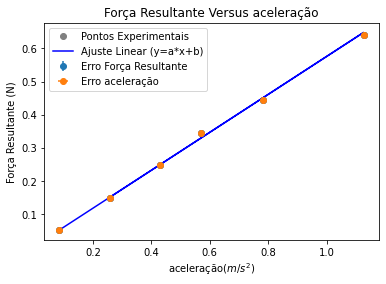

In [ ]:
plt.plot(a,F,'o',color = 'gray')
plt.plot(a,a*C[0]+C[2],'-',color = 'blue')

plt.errorbar(a, F, yerr=eF,fmt='o')
plt.errorbar(a, F, xerr=ea,fmt='o')        
plt.legend(['Pontos Experimentais','Ajuste Linear (y=a*x+b)','Erro Força Resultante','Erro aceleração'])

#plt.ylim([0,0.75])
#plt.xlim([-0.0005,0.0708])
plt.title('Força Resultante Versus aceleração')
plt.xlabel('aceleração($m/s^2$)')
plt.ylabel('Força Resultante (N)')
plt.show()

---
---
---
---
---